# iPhone 15 Augmented Data - Sentiment Analysis
Analyzing sentiment of augmented iPhone 15 reviews dataset

In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [2]:
# =========================
# 1️⃣ LOAD AUGMENTED CSV
# =========================
df = pd.read_csv("../../augmented_data/iphone15_augmented.csv")

print("✅ Augmented data loaded")
print(f"Total reviews: {len(df)}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst 5 rows:")
df.head()

✅ Augmented data loaded
Total reviews: 4061
Columns: ['rating', 'title', 'review_text']

First 5 rows:


,rating,title,review_text
0,5,Awesome,Switch from OnePlus to iPhone I am stunned wit...
1,5,Fabulous!,"So beautiful, so elegant, just a vowww Akshay ..."
2,5,Wonderful,Amezing camera and all over best phone Neeraj ...
3,5,Fabulous!,"Awesome Thakur Surya Pratap Singh , Hanumana G..."
4,5,Worth every penny,Awesome photography experience. Battery backup...


In [ ]:
# =========================
# 2️⃣ DATA OVERVIEW
# =========================
print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"\nRating Distribution:")
print(df['rating'].value_counts().sort_index())
print(f"\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
Shape: (4061, 3)

Rating Distribution:
rating
1     181
2      59
3     125
4     516
5    3180
Name: count, dtype: int64

Missing Values:
rating         0
title          0
review_text    0
dtype: int64


In [4]:
# =========================
# 3️⃣ SENTIMENT FUNCTIONS
# =========================
def get_polarity(text):
    """Calculate sentiment polarity using TextBlob"""
    if pd.isna(text):
        return 0.0
    return TextBlob(str(text)).sentiment.polarity

def get_subjectivity(text):
    """Calculate subjectivity using TextBlob"""
    if pd.isna(text):
        return 0.0
    return TextBlob(str(text)).sentiment.subjectivity

def get_sentiment(score):
    """Classify sentiment based on polarity"""
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

print("✅ Sentiment functions defined")

✅ Sentiment functions defined


In [5]:
# =========================
# 4️⃣ APPLY SENTIMENT ANALYSIS
# =========================
print("Analyzing sentiment... (this may take a minute)")

# Apply sentiment analysis on review text
df["polarity"] = df["review_text"].apply(get_polarity)
df["subjectivity"] = df["review_text"].apply(get_subjectivity)
df["sentiment"] = df["polarity"].apply(get_sentiment)

print("\n✅ Sentiment analysis completed!")
print(f"\nSentiment Distribution:")
print(df["sentiment"].value_counts())

# Show sample results
df[["rating", "review_text", "polarity", "sentiment"]].head(10)

Analyzing sentiment... (this may take a minute)

✅ Sentiment analysis completed!

Sentiment Distribution:
sentiment
Positive    3166
Neutral      751
Negative     144
Name: count, dtype: int64


,rating,review_text,polarity,sentiment
0,5,Switch from OnePlus to iPhone I am stunned wit...,1.000000,Positive
1,5,"So beautiful, so elegant, just a vowww Akshay ...",0.675000,Positive
2,5,Amezing camera and all over best phone Neeraj ...,1.000000,Positive
3,5,"Awesome Thakur Surya Pratap Singh , Hanumana G...",1.000000,Positive
4,5,Awesome photography experience. Battery backup...,0.733333,Positive
5,4,"Very nice Mousam Guha Roy , Matialihat Oct, 2023",0.780000,Positive
6,5,"High quality camera Ajin V , Balaghat Oct, 2023",0.160000,Positive
7,5,Awesome product very happy to hold this. Bette...,0.666667,Positive
8,5,Using this Iphone 15 from 1month and it has be...,1.000000,Positive
9,5,Camera Quality Is Improved Loving It Prithivi ...,0.600000,Positive


In [6]:
# =========================
# 5️⃣ STATISTICS
# =========================
print("Sentiment Statistics:")
print("="*50)
print(f"Average Polarity: {df['polarity'].mean():.3f}")
print(f"Average Subjectivity: {df['subjectivity'].mean():.3f}")
print(f"\nPolarity Range: {df['polarity'].min():.3f} to {df['polarity'].max():.3f}")
print(f"Subjectivity Range: {df['subjectivity'].min():.3f} to {df['subjectivity'].max():.3f}")

print("\n" + "="*50)
print("Sentiment by Rating:")
print(df.groupby('rating')['sentiment'].value_counts().unstack(fill_value=0))

Sentiment Statistics:
Average Polarity: 0.465
Average Subjectivity: 0.566

Polarity Range: -1.000 to 1.000
Subjectivity Range: 0.000 to 1.000

Sentiment by Rating:
sentiment  Negative  Neutral  Positive
rating                                
1                68       59        54
2                27       15        17
3                12       57        56
4                15      109       392
5                22      511      2647


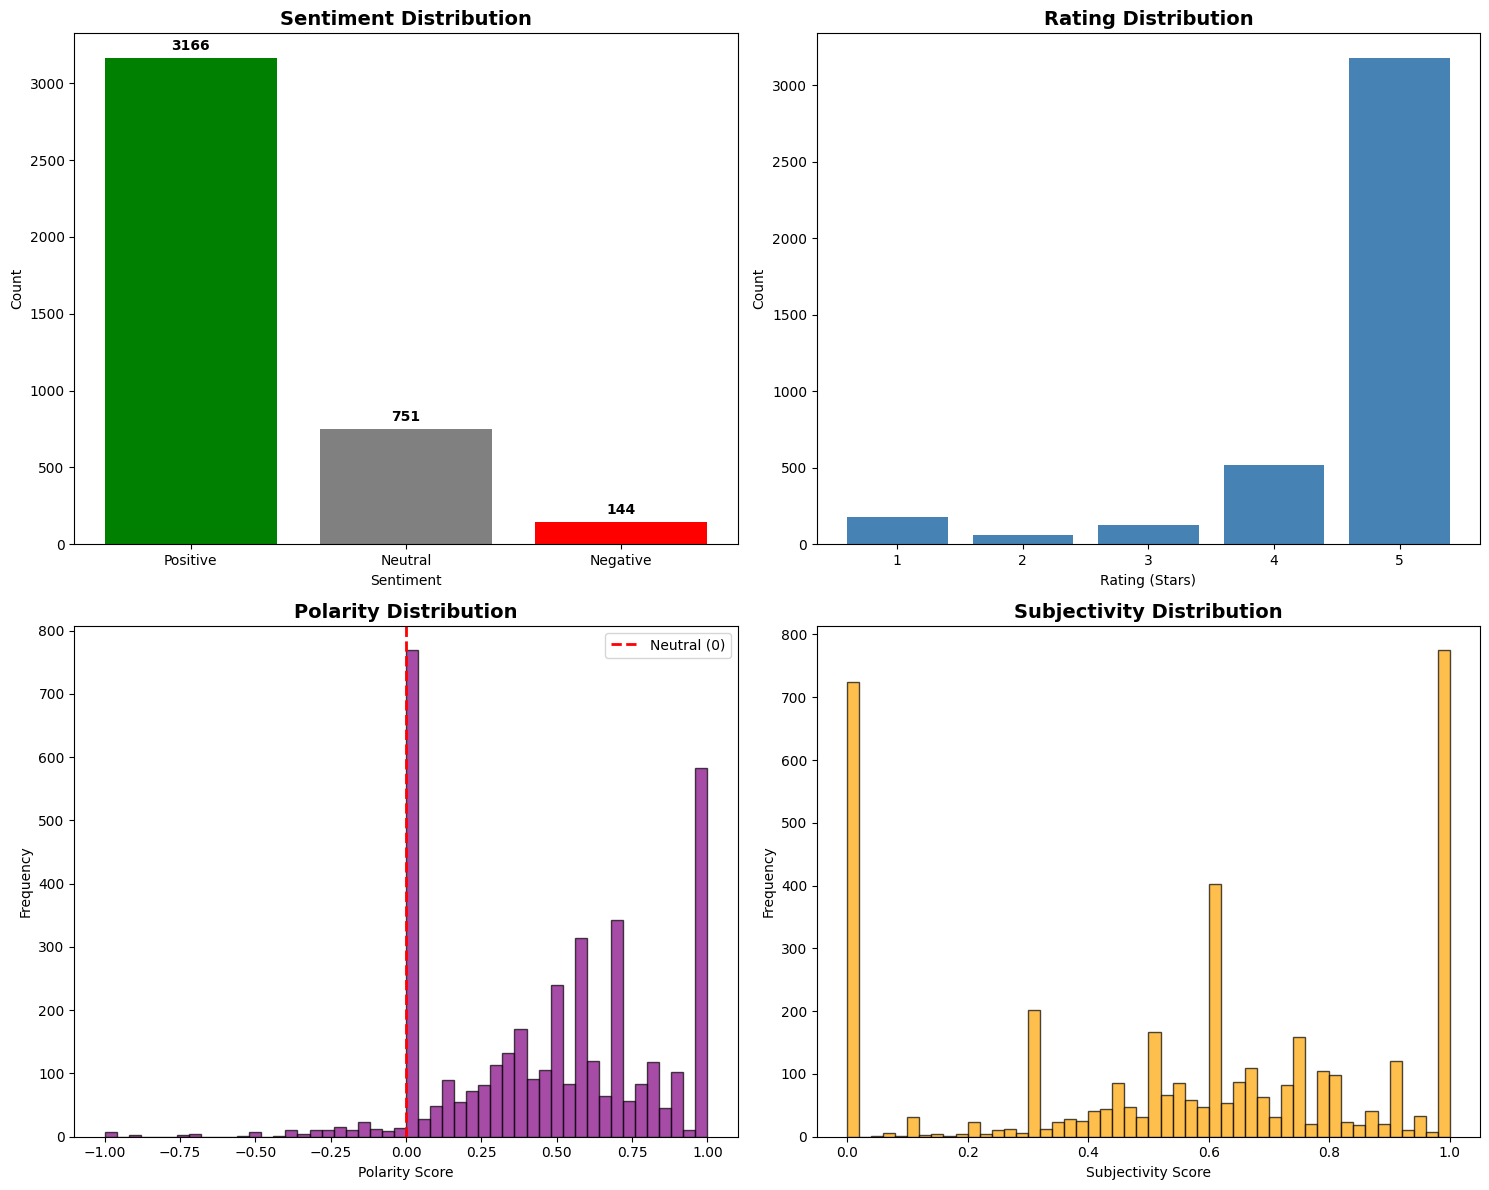

✅ Visualizations saved as 'iphone15_augmented_sentiment_visualizations.png'


In [7]:
# =========================
# 6️⃣ VISUALIZATIONS
# =========================
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Sentiment Distribution
sentiment_counts = df['sentiment'].value_counts()
axes[0, 0].bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'gray', 'red'])
axes[0, 0].set_title('Sentiment Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Sentiment')
axes[0, 0].set_ylabel('Count')
for i, v in enumerate(sentiment_counts.values):
    axes[0, 0].text(i, v + 50, str(v), ha='center', fontweight='bold')

# Plot 2: Rating Distribution
rating_counts = df['rating'].value_counts().sort_index()
axes[0, 1].bar(rating_counts.index, rating_counts.values, color='steelblue')
axes[0, 1].set_title('Rating Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Rating (Stars)')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xticks([1, 2, 3, 4, 5])

# Plot 3: Polarity Distribution
axes[1, 0].hist(df['polarity'], bins=50, color='purple', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Polarity Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Polarity Score')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(0, color='red', linestyle='--', linewidth=2, label='Neutral (0)')
axes[1, 0].legend()

# Plot 4: Subjectivity Distribution
axes[1, 1].hist(df['subjectivity'], bins=50, color='orange', alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Subjectivity Distribution', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Subjectivity Score')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('iphone15_augmented_sentiment_visualizations.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualizations saved as 'iphone15_augmented_sentiment_visualizations.png'")

<Figure size 1200x600 with 0 Axes>

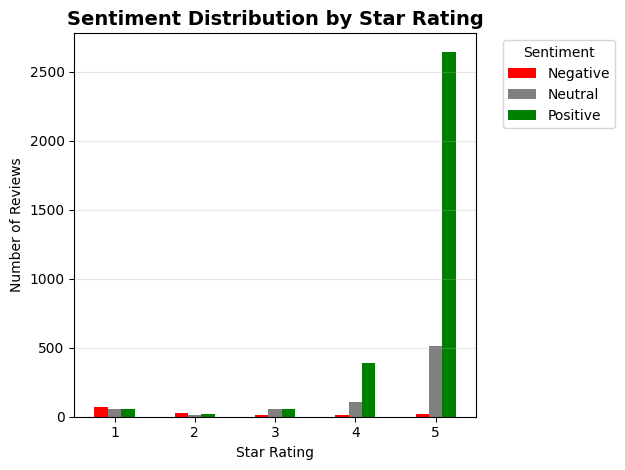

✅ Sentiment vs Rating chart saved


In [8]:
# =========================
# 7️⃣ SENTIMENT vs RATING COMPARISON
# =========================
plt.figure(figsize=(12, 6))

# Group by rating and sentiment
sentiment_by_rating = df.groupby(['rating', 'sentiment']).size().unstack(fill_value=0)
sentiment_by_rating.plot(kind='bar', stacked=False, color=['red', 'gray', 'green'])

plt.title('Sentiment Distribution by Star Rating', fontsize=14, fontweight='bold')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('iphone15_augmented_sentiment_by_rating.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Sentiment vs Rating chart saved")

In [9]:
# =========================
# 8️⃣ SAVE RESULTS
# =========================
output_csv = "iphone15_augmented_sentiment_analysis.csv"
output_excel = "iphone15_augmented_sentiment_analysis.xlsx"

# Save to CSV
df.to_csv(output_csv, index=False)
print(f"✅ Results saved to: {output_csv}")

# Save to Excel
df.to_excel(output_excel, index=False, engine='openpyxl')
print(f"✅ Results saved to: {output_excel}")

print("\n" + "="*50)
print("ANALYSIS COMPLETE!")
print("="*50)
print(f"Total Reviews Analyzed: {len(df)}")
print(f"Positive: {(df['sentiment'] == 'Positive').sum()}")
print(f"Neutral: {(df['sentiment'] == 'Neutral').sum()}")
print(f"Negative: {(df['sentiment'] == 'Negative').sum()}")

✅ Results saved to: iphone15_augmented_sentiment_analysis.csv
✅ Results saved to: iphone15_augmented_sentiment_analysis.xlsx

ANALYSIS COMPLETE!
Total Reviews Analyzed: 4061
Positive: 3166
Neutral: 751
Negative: 144
